In [2]:
#Import the libraries that will be needed in the program.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [3]:
#Display the current working directory
os.getcwd()

'/Users/madhavan/python files'

In [4]:
#Load the excel data file into pandas using the read_excel() function.
data=pd.read_excel(r"/Users/madhavan/Downloads/Crude Oil Prices Daily.xlsx")

In [5]:
#Check whether any null values are there or not if it is present then the following can be done,
#Imputing data using the Imputation method in sklearn.
#Filling NaN values with mean, median, and mode using fillna() method.
#Delete the records
data.tail(10)
data.isnull().any()
data.isnull().sum()
data.dropna(axis=0,inplace=True)
data.isnull().sum()

,Date,Closing Value
8213,2018-06-26,75.23
8214,2018-06-27,77.41
8215,2018-06-28,73.45
8216,2018-06-29,74.13
8217,2018-07-02,73.89
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


Text(0.5, 1.0, 'Variation of oil price over years')

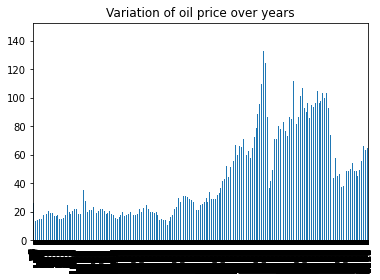

In [10]:
data['Closing Value'].plot(kind='bar')
plt.title('Variation of oil price over years')

In [11]:
data_oil=data["Closing Value"].reset_index()

In [12]:
data_oil

,index,Closing Value
0,0,25.56
1,1,26.00
2,2,26.53
3,3,25.85
4,4,25.87
...,...,...
8211,8217,73.89
8212,8218,74.19
8213,8220,73.05
8214,8221,73.78


In [13]:
#Feature scaling is a method used to normalize the range of independent variables or features of data.
# The next step is to scale the crude oil prices between (0, 1) to avoid intensive computation. 
# Common methods include Standardization and Normalization.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [14]:
data_oil

array([[0.00000000e+00],
       [3.10873267e-03],
       [1.21624909e-04],
       ...,
       [8.97348577e-03],
       [1.00000000e+00],
       [8.99172951e-03]])

<Figure size 1.08e+09x360 with 0 Axes>

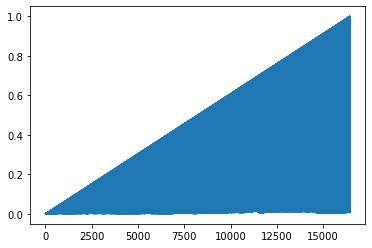

<Figure size 1.08e+09x360 with 0 Axes>

In [79]:
#Data visualization is where a given data set is presented in a graphical format.
# It helps the detection of patterns, trends, and correlations that might go undetected in text-based data.
# Visualize our data using the Matplotlib and seaborn library.
plt.plot(data_oil)
plt.figure(figsize=(15000000,5))

In [76]:
plt.rcParams("figure.figsize")=(20,6)


SyntaxError: cannot assign to function call (1760874162.py, line 2)

In [15]:
#When you are working on a model and you want to train it, you have a dataset.
# But after training, we have to test the model on some test dataset.
# For this, you will need a dataset that is different from the training set you used earlier. 
# But it might not always be possible to have so much data during the development phase.
# In such cases, the solution is to split the dataset into two sets, one for training and the other for testing.
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:,:1]
train_data.shape,test_data.shape
#The size of the train and test data after splitting.
training_size,test_size

In [18]:
# convert an array of values into a dataset matrix
def create_dataset (dataset,time_step=1):
    datax,datay =[],[]
    for i in range(len(dataset)-time_step-1) :
        a=dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append (dataset[i + time_step, 0])
    return np.array(datax),np.array(datay)


In [19]:
# reshape into Xat, t+1, t+2, t+3 and Y=t+4
time_step = 10
x_train,y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [20]:
#Shape of training data.
print(x_train.shape),print(y_train.shape)

(10669, 10)
(10669,)


(None, None)

In [21]:
#Shape of test data.
print (x_test.shape), print (y_test.shape)

(5741, 10)
(5741,)


(None, None)

In [22]:
#The data of X_train.
x_train

array([[0.00000000e+00, 3.10873267e-03, 1.21624909e-04, ...,
        3.14400389e-03, 4.86499635e-04, 3.14643639e-03],
       [3.10873267e-03, 1.21624909e-04, 3.16224763e-03, ...,
        4.86499635e-04, 3.14643639e-03, 6.08124544e-04],
       [1.21624909e-04, 3.16224763e-03, 2.43249818e-04, ...,
        3.14643639e-03, 6.08124544e-04, 3.16589638e-03],
       ...,
       [6.48625639e-01, 7.22451958e-03, 6.48747263e-01, ...,
        7.46898565e-03, 6.49112138e-01, 7.47506689e-03],
       [7.22451958e-03, 6.48747263e-01, 7.33154950e-03, ...,
        6.49112138e-01, 7.47506689e-03, 6.49233763e-01],
       [6.48747263e-01, 7.33154950e-03, 6.48868888e-01, ...,
        7.47506689e-03, 6.49233763e-01, 7.51398686e-03]])

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM.
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [24]:
#Create the stacked LSTM model.
#Import the model building libraries.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

2022-10-30 12:01:32.161793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
#Initializing the libraries.
model=Sequential()

2022-10-30 12:01:43.371619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
#Adding LSTM layers.
model.add(LSTM(50, return_sequences=True, input_shape=(10,1))) 
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

In [27]:
#Adding output layers.
model.add(Dense(1))

In [28]:
#Information about the model and it's layers.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Configuring the learning process.
#Metrics are used to evaluate the performance of your model.
model.compile(loss="mean_squared_error",optimizer="adam")

In [30]:
#Train the model.
# RNN weights are updated every 64 stock prices with a batch size of 64.
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
167/167 [==============================] - 9s 29ms/step - loss: 0.0193 - val_loss: 0.0269
Epoch 2/50
167/167 [==============================] - 4s 24ms/step - loss: 7.9137e-04 - val_loss: 0.0129
Epoch 3/50
167/167 [==============================] - 4s 27ms/step - loss: 1.9121e-04 - val_loss: 0.0106
Epoch 4/50
167/167 [==============================] - 4s 24ms/step - loss: 1.1535e-04 - val_loss: 0.0067
Epoch 5/50
167/167 [==============================] - 4s 24ms/step - loss: 1.3334e-04 - val_loss: 0.0059
Epoch 6/50
167/167 [==============================] - 4s 25ms/step - loss: 2.0058e-04 - val_loss: 0.0048
Epoch 7/50
167/167 [==============================] - 4s 25ms/step - loss: 6.3217e-05 - val_loss: 0.0046
Epoch 8/50
167/167 [==============================] - 4s 26ms/step - loss: 2.4072e-05 - val_loss: 0.0035
Epoch 9/50
167/167 [==============================] - 4s 26ms/step - loss: 1.7604e-05 - val_loss: 0.0029
Epoch 10/50
167/167 [==============================] - 4s 2

In [31]:
#Tranform to original from.
train_predict= model.predict(x_train)
train_predict=scaler.inverse_transform(train_predict)
test_predict= model.predict(x_test)
test_predict=scaler.inverse_transform(test_predict)

180/180 [==============================] - 1s 6ms/step


In [32]:
#Calculate RMSeperformance metrics.
import math
from sklearn.metrics import mean_squared_error
math.sqrt (mean_squared_error(y_train, train_predict))

2180.6258991314994

In [33]:
#Save the model.
from tensorflow.keras.models import load_model
model.save("crude_oil.h5")

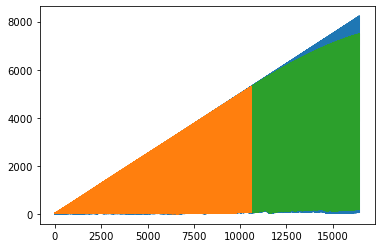

In [60]:
##Plotting
#Shift train predictions for plotting.
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1,:] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
#Print length of data.
len(test_data)

5752

In [37]:
#Create the input and reshape it and convert it into list
x_input=test_data[5742: ].reshape (1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

(1, 10)

In [39]:
temp_input

[0.9993918754560934,
 0.008986864509851618,
 0.9995135003648747,
 0.009023351982486013,
 0.9997567501824374,
 0.00888469958647531,
 0.9998783750912187,
 0.008973485769885672,
 1.0,
 0.008991729506202872]

In [80]:
#For predicting next 10 days crude oil prices we consider n_steps=10.
#We create the input for prediction, index starting from the date 10 days before the first date in the test dataset.
# Then, reshape the inputs to have only 1 column and predict using model_predict predefined function.
lst_output=[] 
n_steps=10
i=0 
while(i<10):
    if(len(temp_input)>10):
        print (temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format (i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format (i,yhat))
        temp_input.extend (yhat [0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1 
    else:
        x_input = x_input.reshape( (1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print (yhat [0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend (yhat.tolist())
        i=i+1

[-0.03380665183067322, 0.8260437250137329, 0.03285090625286102, 0.8781332969665527, 0.13991111516952515, 0.9468504786491394, 0.1907729208469391, 0.9217405319213867, 0.02330704592168331, 0.744361937046051, -0.23653282225131989]
0 day input [ 0.82604373  0.03285091  0.8781333   0.13991112  0.94685048  0.19077292
  0.92174053  0.02330705  0.74436194 -0.23653282]
[[[ 0.82604373]
  [ 0.03285091]
  [ 0.8781333 ]
  [ 0.13991112]
  [ 0.94685048]
  [ 0.19077292]
  [ 0.92174053]
  [ 0.02330705]
  [ 0.74436194]
  [-0.23653282]]]
0 day output [[0.7101775]]
[0.8260437250137329, 0.03285090625286102, 0.8781332969665527, 0.13991111516952515, 0.9468504786491394, 0.1907729208469391, 0.9217405319213867, 0.02330704592168331, 0.744361937046051, -0.23653282225131989, 0.710177481174469]
[0.8260437250137329, 0.03285090625286102, 0.8781332969665527, 0.13991111516952515, 0.9468504786491394, 0.1907729208469391, 0.9217405319213867, 0.02330704592168331, 0.744361937046051, -0.23653282225131989, 0.710177481174469]
1

In [53]:
#Create a visualization plot to easily review the prediction.
day_new=np.arange(1,11)
day_pred=np.arange (11,21)
len(data_oil)
plt.plot(day_new, scaler.inverse_transform(data_oil[16422:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))
k=scaler.inverse_transform(lst_output)
k

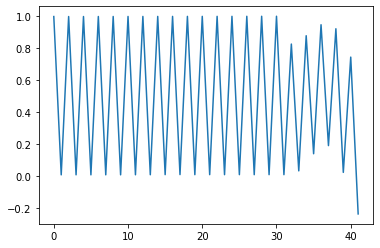

In [56]:
#Merge the the past data and next 10 days output prediction.
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[16400:])

In [57]:
#Reversing the predictions.
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3[16400:])